### EDA on Train Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading all the training datasets 

Train_Beneficiary = pd.read_csv('/Users/suborna/Github/Capstone_Project/Data/Train_Beneficiary.csv')
Train_Inpatient = pd.read_csv('/Users/suborna/Github/Capstone_Project/Data/Train_Inpatient.csv')
Train_Outpatient = pd.read_csv('/Users/suborna/Github/Capstone_Project/Data/Train_Outpatient.csv')
Test_label = pd.read_csv('/Users/suborna/Github/Capstone_Project/Data/Train.csv')

In [3]:
pd.set_option('display.max_columns', 100) # shows all the columns

In [4]:
Train_Beneficiary.shape # number of rows & columns

(138556, 25)

In [5]:
Train_Inpatient.shape # number of rows & columns

(40474, 30)

In [6]:
Train_Outpatient.shape # number of rows & columns

(517737, 27)

In [7]:
Test_label.shape

(5410, 2)

## Dropping columns

In [8]:
Train_Beneficiary = Train_Beneficiary.drop(['DOD'], axis = 1)

In [9]:
Train_Inpatient = Train_Inpatient.drop(['ClmProcedureCode_6'], axis = 1) # dropping because 100% data as NAs

In [10]:
Train_Outpatient = Train_Outpatient.drop(['ClmProcedureCode_5', 'ClmProcedureCode_6'], axis = 1) # dropping because 100% data as NAs

## Replacing NAs with 0

In [11]:
Train_Inpatient[['DeductibleAmtPaid', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5']] = Train_Inpatient[[\
                                                                                             'DeductibleAmtPaid', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5']].fillna(0)

In [12]:
Train_Outpatient[['ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4']] = Train_Outpatient[['ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4']].fillna(0)

In [13]:
Train_Inpatient[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']] = Train_Inpatient[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']].fillna('None')

In [14]:
Train_Outpatient[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']] = Train_Outpatient[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']].fillna('None')

## Counting number of missing values

In [15]:
Train_Beneficiary.isnull().sum() # row = 138556

BeneID                             0
DOB                                0
Gender                             0
Race                               0
RenalDiseaseIndicator              0
State                              0
County                             0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
dtype: int64

In [16]:
Train_Inpatient.isnull().sum() # row = 40474

BeneID                    0
ClaimID                   0
ClaimStartDt              0
ClaimEndDt                0
Provider                  0
InscClaimAmtReimbursed    0
AttendingPhysician        0
OperatingPhysician        0
OtherPhysician            0
AdmissionDt               0
ClmAdmitDiagnosisCode     0
DeductibleAmtPaid         0
DischargeDt               0
DiagnosisGroupCode        0
ClmDiagnosisCode_1        0
ClmDiagnosisCode_2        0
ClmDiagnosisCode_3        0
ClmDiagnosisCode_4        0
ClmDiagnosisCode_5        0
ClmDiagnosisCode_6        0
ClmDiagnosisCode_7        0
ClmDiagnosisCode_8        0
ClmDiagnosisCode_9        0
ClmDiagnosisCode_10       0
ClmProcedureCode_1        0
ClmProcedureCode_2        0
ClmProcedureCode_3        0
ClmProcedureCode_4        0
ClmProcedureCode_5        0
dtype: int64

In [17]:
Train_Outpatient.isnull().sum() # row = 517737

BeneID                    0
ClaimID                   0
ClaimStartDt              0
ClaimEndDt                0
Provider                  0
InscClaimAmtReimbursed    0
AttendingPhysician        0
OperatingPhysician        0
OtherPhysician            0
ClmDiagnosisCode_1        0
ClmDiagnosisCode_2        0
ClmDiagnosisCode_3        0
ClmDiagnosisCode_4        0
ClmDiagnosisCode_5        0
ClmDiagnosisCode_6        0
ClmDiagnosisCode_7        0
ClmDiagnosisCode_8        0
ClmDiagnosisCode_9        0
ClmDiagnosisCode_10       0
ClmProcedureCode_1        0
ClmProcedureCode_2        0
ClmProcedureCode_3        0
ClmProcedureCode_4        0
DeductibleAmtPaid         0
ClmAdmitDiagnosisCode     0
dtype: int64

## Checking 1st 5 rows of all 3 data sets

In [18]:
Train_Beneficiary.head() # 1 means Yes, 2 means No

,BeneID,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


In [19]:
Train_Inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,0,0.0,0.0,0.0,0.0,0.0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,0,0,0,0,0,0,0,7092.0,0.0,0.0,0.0,0.0
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,0,0,0,0,0.0,0.0,0.0,0.0,0.0
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,0,331.0,0.0,0.0,0.0,0.0
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,0,3893.0,0.0,0.0,0.0,0.0


In [20]:
Train_Outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,None,78943,V5866,V1272,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,None,None,6115,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,None,None,2723,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,None,71988,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,None,82382,30000,72887,4280,7197,V4577,0,0,0,0,0.0,0.0,0.0,0.0,0,71947


## Checking rows that has missing values for all 3 physician columns

In [21]:
Train_Outpatient.loc[(Train_Outpatient.AttendingPhysician.isnull() == True) & (Train_Outpatient.OperatingPhysician.isnull() == True) & ((Train_Outpatient.OtherPhysician.isnull() == True))]

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,DeductibleAmtPaid,ClmAdmitDiagnosisCode


In [22]:
Train_Inpatient.loc[(Train_Inpatient.AttendingPhysician.isnull() == True) & (Train_Inpatient.OperatingPhysician.isnull() == True) & ((Train_Inpatient.OtherPhysician.isnull() == True))]

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5


## Checking number of unique values in Physician columns

In [23]:
Train_Outpatient.AttendingPhysician.nunique()

74110

In [24]:
Train_Outpatient.OperatingPhysician.nunique()

28533

In [25]:
Train_Outpatient.OtherPhysician.nunique()

44389

## Merging Beneficiary data with inpatient & outpatient data (2 seperate dataframe)

In [26]:
Merged_Inpatient = pd.merge(Train_Beneficiary, Train_Inpatient, how = 'inner', on = 'BeneID')

In [27]:
Merged_Outpatient = pd.merge(Train_Beneficiary, Train_Outpatient, how = 'inner', on = 'BeneID')

In [28]:
Merged_Inpatient.head() # showing 1st 5 rows of the dataset

,BeneID,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5
0,BENE11001,1943-01-01,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,0,0.0,0.0,0.0,0.0,0.0
1,BENE11001,1943-01-01,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,0,0,0,0,0,0,0,7092.0,0.0,0.0,0.0,0.0
2,BENE11001,1943-01-01,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,0,0,0,0,0.0,0.0,0.0,0.0,0.0
3,BENE11011,1914-03-01,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,0,331.0,0.0,0.0,0.0,0.0
4,BENE11014,1938-04-01,2,1,Y,45,780,12,12,2,1,1,2,1,1,2,1,2,2,2,21260,2136,120,100,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,0,3893.0,0.0,0.0,0.0,0.0


In [29]:
Merged_Outpatient.head()

,BeneID,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,1936-09-01,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,None,78943,V5866,V1272,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,56409
1,BENE11003,1936-08-01,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,None,None,6115,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,79380
2,BENE11003,1936-08-01,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,None,None,2723,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0
3,BENE11004,1922-07-01,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,None,71988,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0
4,BENE11004,1922-07-01,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,None,82382,30000,72887,4280,7197,V4577,0,0,0,0,0.0,0.0,0.0,0.0,0,71947


In [30]:
Test_label.loc[Test_label.Provider == 'PRV56011'] # cheking provider IDs for Potential Fraud

,Provider,PotentialFraud
4004,PRV56011,Yes


## Replacing values representing 'No' with number 0 for ease of computation

In [31]:
replace_two = ['Gender', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', \
                      'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', \
                      'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']

Merged_Inpatient.RenalDiseaseIndicator = Merged_Inpatient.RenalDiseaseIndicator.replace('Y', 1)
Merged_Inpatient[replace_two] = Merged_Inpatient[replace_two].replace(2, 0)

In [32]:
Merged_Outpatient.RenalDiseaseIndicator = Merged_Outpatient.RenalDiseaseIndicator.replace('Y', 1)
Merged_Outpatient[replace_two] = Merged_Outpatient[replace_two].replace(2, 0)

In [33]:
# printing all the unique values to make sure the columns are good to go (Inpatient)
for column in replace_two:
    print(column, Merged_Inpatient[column].unique())

Gender [1 0]
ChronicCond_Alzheimer [1 0]
ChronicCond_Heartfailure [0 1]
ChronicCond_KidneyDisease [1 0]
ChronicCond_Cancer [0 1]
ChronicCond_ObstrPulmonary [0 1]
ChronicCond_Depression [1 0]
ChronicCond_Diabetes [1 0]
ChronicCond_IschemicHeart [1 0]
ChronicCond_Osteoporasis [0 1]
ChronicCond_rheumatoidarthritis [1 0]
ChronicCond_stroke [1 0]


In [34]:
# printing all the unique values to make sure the columns are good to go (Outpatient)
for column in replace_two:
    print(column, Merged_Outpatient[column].unique())

Gender [0 1]
ChronicCond_Alzheimer [0 1]
ChronicCond_Heartfailure [0 1]
ChronicCond_KidneyDisease [0 1]
ChronicCond_Cancer [0 1]
ChronicCond_ObstrPulmonary [0 1]
ChronicCond_Depression [0 1]
ChronicCond_Diabetes [0 1]
ChronicCond_IschemicHeart [0 1]
ChronicCond_Osteoporasis [0 1]
ChronicCond_rheumatoidarthritis [0 1]
ChronicCond_stroke [0 1]


## How many medical doctors are there in the train inpatient dataset? 

In [35]:
x = Train_Inpatient.AttendingPhysician.unique().tolist()
y = Train_Inpatient.OperatingPhysician.unique().tolist()
z = Train_Inpatient.OtherPhysician.unique().tolist()
len(set(x+y+z)) # minus 1 for None type. 18256

18257

### Do inpatient patients show worse health conditions (in terms of chronic diseases) than typical outpatient patients? Provide an analysis on these issues.

In [43]:
chronic_conditions = ['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', \
                      'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', \
                      'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']

Merged_Inpatient['Chronic_Condition_Count'] = Merged_Inpatient[chronic_conditions].sum(axis = 1)

Merged_Outpatient['Chronic_Condition_Count'] = Merged_Outpatient[chronic_conditions].sum(axis = 1)

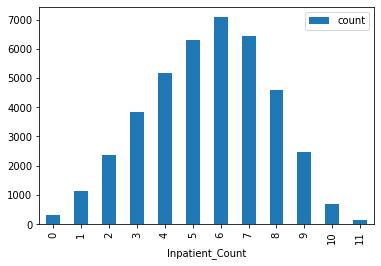

In [95]:
chronic_count_per_Inpatients.groupby('Inpatient_Count')['Inpatient_Count'].agg(['count']).plot.bar()

## Do those who have more visits to the providers have worse health conditions?

In [82]:
visit_count = Merged_Inpatient.groupby('BeneID')['BeneID'].agg(['count'])
Merged_Inpatient = Merged_Inpatient.merge(visit_count, how = 'inner', on = 'BeneID')
Merged_Inpatient = Merged_Inpatient.rename(columns = {'count': 'Visit_count'})

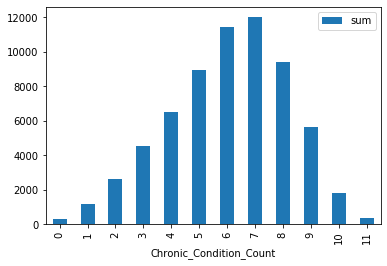

In [94]:
Merged_Inpatient.groupby('Chronic_Condition_Count')['Visit_count'].agg(['sum']).plot.bar()

In [101]:
visit_count_2 = Merged_Outpatient.groupby('BeneID')['BeneID'].agg(['count'])
Merged_Outpatient = Merged_Outpatient.merge(visit_count_2, how = 'inner', on = 'BeneID')
Merged_Outpatient = Merged_Outpatient.rename(columns = {'count': 'Visit_count'})

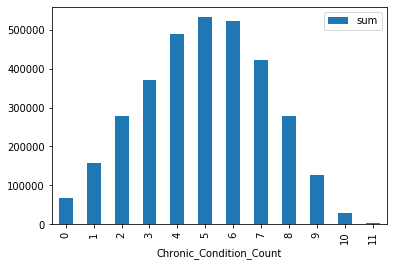

In [102]:
Merged_Outpatient.groupby('Chronic_Condition_Count')['Visit_count'].agg(['sum']).plot.bar()

In [44]:
chronic_count_per_Inpatients = pd.DataFrame(Merged_Inpatient[chronic_conditions].sum(axis = 1)).sort_values(by = 0, ascending = False)
chronic_count_per_Inpatients.columns = ['Inpatient_Count'] # renamed column name
x = chronic_count_per_Inpatients.groupby('Inpatient_Count')['Inpatient_Count'].agg(['count'])

chronic_count_per_Outpatients = pd.DataFrame(Merged_Outpatient[chronic_conditions].sum(axis = 1)).sort_values(by = 0, ascending = False)
chronic_count_per_Outpatients.columns = ['Outpatient_Count']
y = chronic_count_per_Outpatients.groupby('Outpatient_Count')['Outpatient_Count'].agg(['count'])

In [103]:
z = pd.concat([x, y], axis = 1).reset_index()
z.columns = [['Condition_Count', 'inpatients_count', 'outpatients_count']]
# z['Difference'] = z['outpatients_count'] - z['inpatients_count']
z

,Condition_Count,inpatients_count,outpatients_count
0,0,302,21591
1,1,1120,40210
2,2,2377,57638
3,3,3820,68542
4,4,5177,78284
5,5,6292,76406
6,6,7085,69431
7,7,6421,53754
8,8,4585,33302
9,9,2475,14747


## Do doctors serve for different providers? Study the distribution of hospital counts per doctor? Is it possible to characterize those doctors who move around among different providers?

In [170]:
AP = Merged_Inpatient[['Provider', 'AttendingPhysician']].copy().rename(columns = {'AttendingPhysician': 'Physician'})
OPP = Merged_Inpatient[['Provider', 'OperatingPhysician']].copy().rename(columns = {'OperatingPhysician': 'Physician'})
OP = Merged_Inpatient[['Provider', 'OtherPhysician']].copy().rename(columns = {'OtherPhysician': 'Physician'})

merged_physician = pd.concat([AP, OPP,OP], axis = 0)

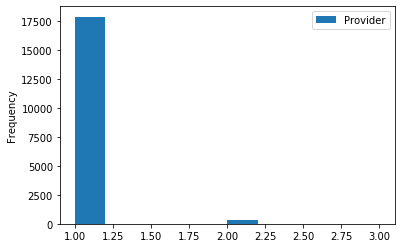

In [173]:
from pylab import rcParams
rcParams['figure.figsize'] = 6, 4
provider_count_in = pd.DataFrame(merged_physician.groupby('Physician')['Provider'].agg('nunique')).sort_values(ascending = False, by = 'Provider').drop('None', axis = 0).reset_index()
provider_count_in.plot.hist()

In [177]:
provider_count_in

,Physician,Provider
0,PHY395862,3
1,PHY316039,3
2,PHY348595,3
3,PHY423850,3
4,PHY362823,3
...,...,...
18251,PHY352396,1
18252,PHY352410,1
18253,PHY352411,1
18254,PHY352415,1


In [161]:
provider_count_in.groupby('Provider')['Physician'].agg('count')

Provider
1    17882
2      360
3       14
Name: Physician, dtype: int64

In [171]:
AP_out = Merged_Outpatient[['Provider', 'AttendingPhysician']].copy().rename(columns = {'AttendingPhysician': 'Physician'})
OPP_out = Merged_Outpatient[['Provider', 'OperatingPhysician']].copy().rename(columns = {'OperatingPhysician': 'Physician'})
OP_out = Merged_Outpatient[['Provider', 'OtherPhysician']].copy().rename(columns = {'OtherPhysician': 'Physician'})

merged_physician_out = pd.concat([AP_out, OPP_out,OP_out], axis = 0)

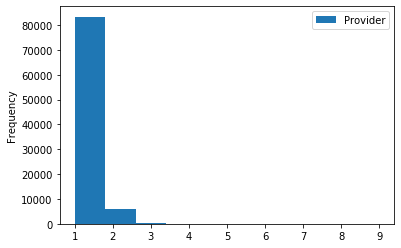

In [174]:
provider_count_out = pd.DataFrame(merged_physician_out.groupby('Physician')['Provider'].agg('nunique')).sort_values(ascending = False, by = 'Provider').drop('None', axis = 0).reset_index()
provider_count_out.plot.hist()

In [169]:
provider_count_out.groupby('Provider')['Physician'].agg('count')

Provider
1    83392
2     5760
3      505
4       75
5       27
6        8
8        2
9        1
Name: Physician, dtype: int64

## Do patients go to different hospitals? Study the distribution of hospital counts per patients? Is it possible to characterize those patients who receive services from a lot of different hospitals?

In [183]:
patient_count_in = pd.DataFrame(Merged_Inpatient.groupby('BeneID')['Provider'].agg('nunique')).sort_values(ascending = False, by = 'Provider').reset_index()
patient_count_in.head(20)

,BeneID,Provider
0,BENE126118,5
1,BENE83032,5
2,BENE55497,5
3,BENE104565,5
4,BENE55873,5
5,BENE43638,5
6,BENE117116,5
7,BENE92472,5
8,BENE49263,5
9,BENE63935,5


In [186]:
patient_count_in.groupby('Provider')['BeneID'].agg('count')

Provider
1    26694
2     3965
3      541
4       76
5       13
Name: BeneID, dtype: int64

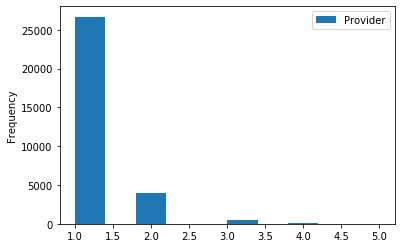

In [184]:
patient_count_in.plot.hist()

In [187]:
patient_count_out = pd.DataFrame(Merged_Outpatient.groupby('BeneID')['Provider'].agg('nunique')).sort_values(ascending = False, by = 'Provider').reset_index()
patient_count_out.head(20)

,BeneID,Provider
0,BENE40202,19
1,BENE122143,17
2,BENE122118,16
3,BENE153509,16
4,BENE120090,16
5,BENE140999,16
6,BENE37573,15
7,BENE11132,15
8,BENE107120,15
9,BENE32909,15


In [188]:
patient_count_out.groupby('Provider')['BeneID'].agg('count')

Provider
1     49671
2     34432
3     21370
4     12646
5      7168
6      3992
7      2277
8      1192
9       610
10      288
11      177
12       89
13       39
14       12
15       11
16        4
17        1
19        1
Name: BeneID, dtype: int64

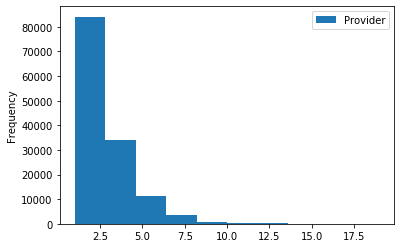

In [189]:
patient_count_out.plot.hist()

In [200]:
Merged_Outpatient.loc[Merged_Outpatient.BeneID == 'BENE122873']

,BeneID,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,DeductibleAmtPaid,ClmAdmitDiagnosisCode,Chronic_Condition_Count,Visit_count
390512,BENE122873,1975-04-01,0,1,1,11,470,12,12,1,1,1,0,1,1,1,1,0,0,1,20000,4272,330,510,CLM219938,2009-02-28,2009-02-28,PRV52521,60,PHY430748,None,None,78907,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,78900,8,4
390513,BENE122873,1975-04-01,0,1,1,11,470,12,12,1,1,1,0,1,1,1,1,0,0,1,20000,4272,330,510,CLM360309,2009-05-15,2009-05-15,PRV52341,60,PHY371579,None,PHY424344,25022,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,8,4
390514,BENE122873,1975-04-01,0,1,1,11,470,12,12,1,1,1,0,1,1,1,1,0,0,1,20000,4272,330,510,CLM371309,2009-05-21,2009-05-21,PRV52395,90,PHY367015,None,None,41189,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,8,4
390515,BENE122873,1975-04-01,0,1,1,11,470,12,12,1,1,1,0,1,1,1,1,0,0,1,20000,4272,330,510,CLM641742,2009-10-21,2009-10-21,PRV52308,80,PHY426416,None,PHY426416,30392,2989,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,8,4


## Do the same providers provide both inpatient and outpatient services? Summarize your findings.

In [214]:
unique_Out = Merged_Outpatient.Provider.unique() # 5012 providers
unique_In = Merged_Inpatient.Provider.unique() # 2092 providers

In [213]:
len(np.intersect1d(unique_Out, unique_In))

1694

## Do Some of the same patients receive both inpatient and outpatient services? Summarize your findings.

In [215]:
Bene_Out = Merged_Outpatient.BeneID.unique() # 133980 providers
Bene_In = Merged_Inpatient.BeneID.unique() # 31289 providers

In [219]:
len(np.intersect1d(Bene_Out, Bene_In))

26713